In [2]:
import io
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

%matplotlib inline

import polars as pl
from skimpy import skim
from summarytools import dfSummary
#summarytools doesnt work with polars library, it works with pandas tho

#%load_ext cudf.pandas
#supercharges workflow with GPU acceleration using cudf.pandas
#Im having pip install issues with cudf so commenting it out for now

## Final EDA?

In [3]:
fifa = pd.read_csv(r'C:\Users\admin\OneDrive\Documents\GitHub\Plotting\fifa_dataset_cleaned\fifa_training_2017_2022.csv')
#fifa.style.bar(cmap = "Blues", subset = "Value")
#fifa.style.bar(color = "blue", subset= "Value")
#pandas dataframe styling!!!
fifa.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Contract_Years_Remaining,Position_Group,Attacking_Composite,Passing_Composite,Defending_Composite,Physical_Composite,Technical_Composite,Pace_Composite,Int_Rep_Category,Market_Tier
0,176580,L. Suárez,29,Uruguay,92,92,FC Barcelona,83000000.0,525000.0,2291,...,4.0,Forward,89.000000,77.000000,37.666667,79.333333,87.666667,82.5,Worldwide,Superstar
1,178518,R. Nainggolan,28,Belgium,86,86,Roma,37500000.0,130000.0,2290,...,4.0,Other,82.000000,80.333333,83.666667,82.666667,79.333333,79.5,National,Star
2,181872,A. Vidal,29,Chile,87,87,FC Bayern München,41500000.0,180000.0,2285,...,2.0,Other,82.000000,82.000000,83.000000,84.666667,78.333333,75.5,Continental,Star
3,197445,D. Alaba,24,Austria,86,89,FC Bayern München,41500000.0,140000.0,2279,...,4.0,Defender,76.333333,80.333333,82.333333,79.333333,80.000000,86.0,Continental,Star
4,195864,P. Pogba,23,France,88,94,Manchester United,71500000.0,225000.0,2271,...,4.0,Other,82.666667,86.666667,71.333333,89.000000,87.666667,77.0,Continental,Superstar


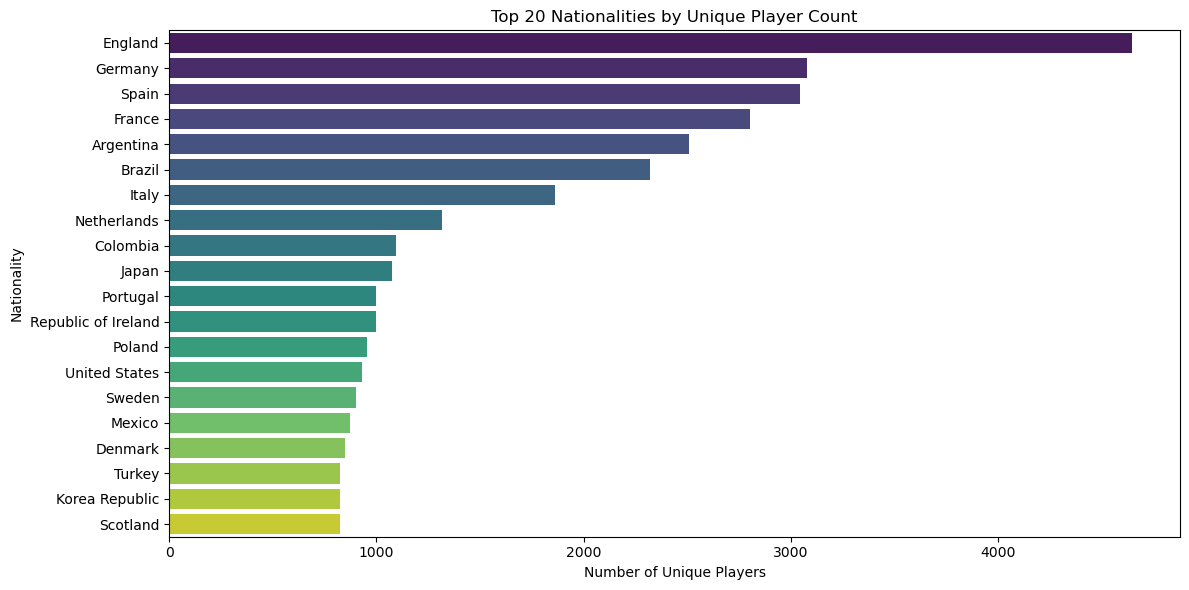

In [ ]:
# Nationality of Players Plot for Unique Players
unique_players = fifa.drop_duplicates(subset=['Name'])
nationality_counts = unique_players['Nationality'].value_counts().head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=nationality_counts.values, y=nationality_counts.index, palette='viridis')
plt.title('Top 20 Nationalities by Unique Player Count')
plt.xlabel('Number of Unique Players')
plt.ylabel('Nationality')
plt.tight_layout()
plt.show()
#This graph suggests that England has the most number of fifa players!!!


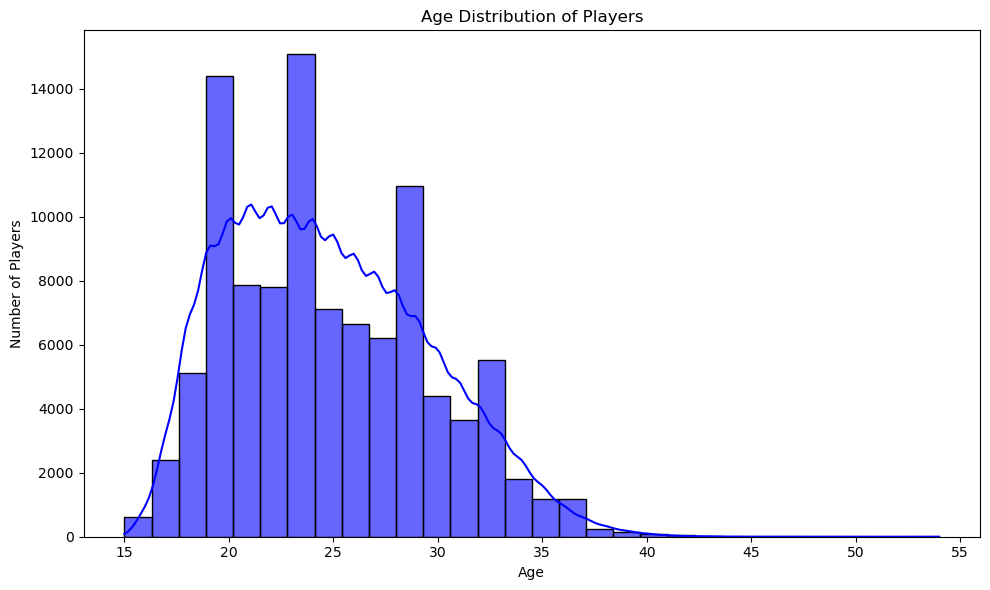

In [ ]:
# Age of Players Plotted
plt.figure(figsize=(10,6))
sns.histplot(fifa['Age'], bins=30, kde=True, color='blue', alpha=0.6, edgecolor='black', linewidth=1)
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.tight_layout()
plt.show()
#This graph shows us how old players were when they played from 2017-2023

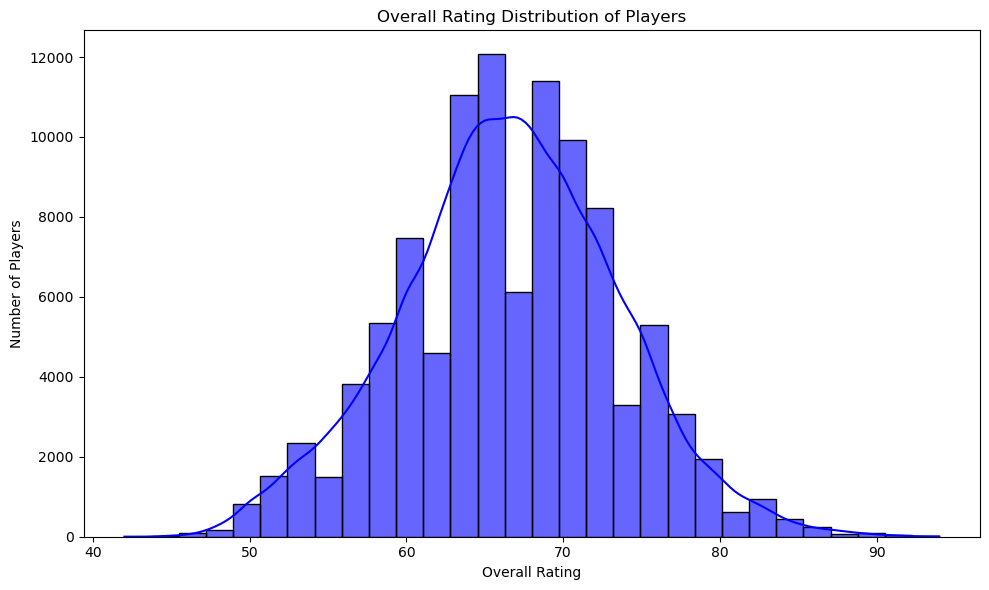

In [ ]:
# Distribution of Overall Ratings
plt.figure(figsize=(10,6))
sns.histplot(fifa['Overall'], bins=30, kde=True, color='blue', alpha=0.6, edgecolor='black', linewidth=1)
plt.title('Overall Rating Distribution of Players')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Players')
plt.tight_layout()
plt.show()

#This graph shows the distribution of player overall ratings in the FIFA dataset.
#The histogram displays the frequency of players at different overall rating intervals, while the KDE curve provides a smoothed estimate of the overall rating distribution. 
#This visualization helps to understand the overall rating demographics of players in the dataset, highlighting common overall rating ranges and potential outliers.

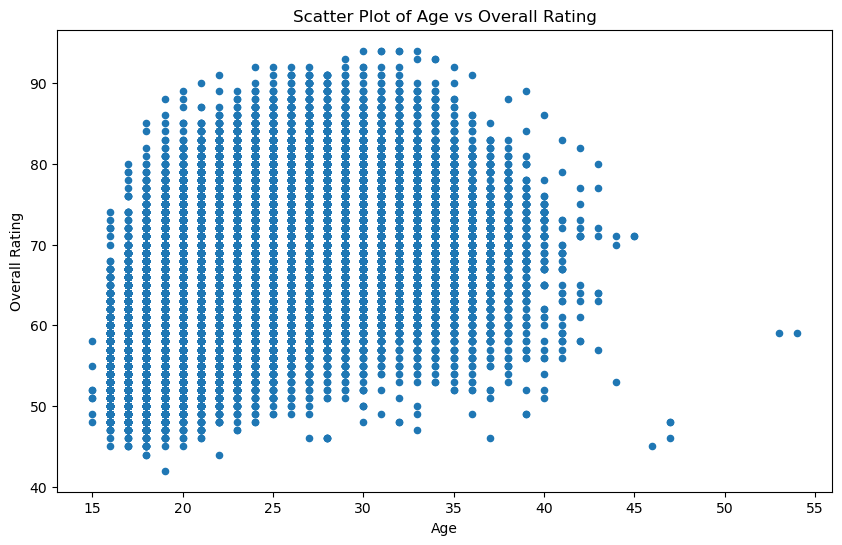

In [34]:
#Age vs Overall
fifa.plot(kind = "scatter", x = "Age", y = "Overall", cmap = "Blues", figsize = (10,6))
plt.title('Scatter Plot of Age vs Overall Rating')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.show()
#The graph shows being in your 20-25s and having overall rating of 60-70 is the most common

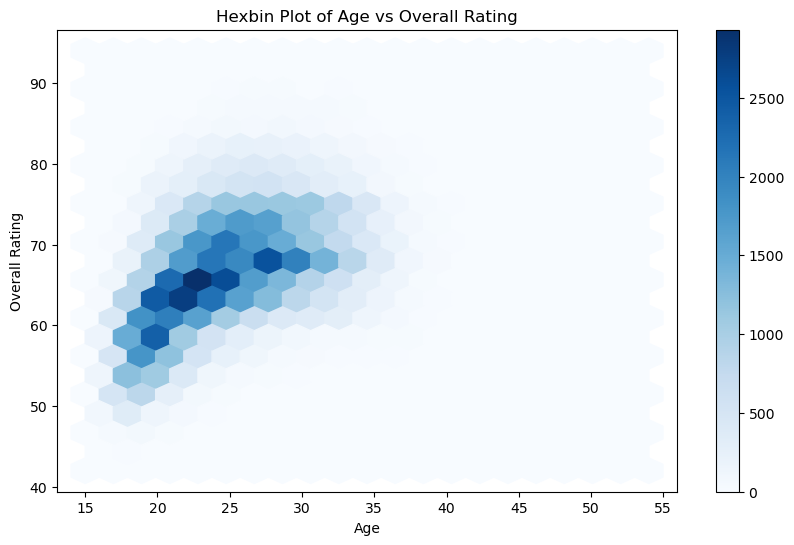

In [ ]:
#Age vs Overall
fifa.plot(kind = "hexbin", x = "Age", y = "Overall", gridsize = 20, cmap = "Blues", figsize = (10,6))
plt.title('Hexbin Plot of Age vs Overall Rating')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.show()
#The graph shows being in your 20-25s and having overall rating of 60-70 is the most common
#Better plot than scatter plot as it shows more density and its intensity by colour

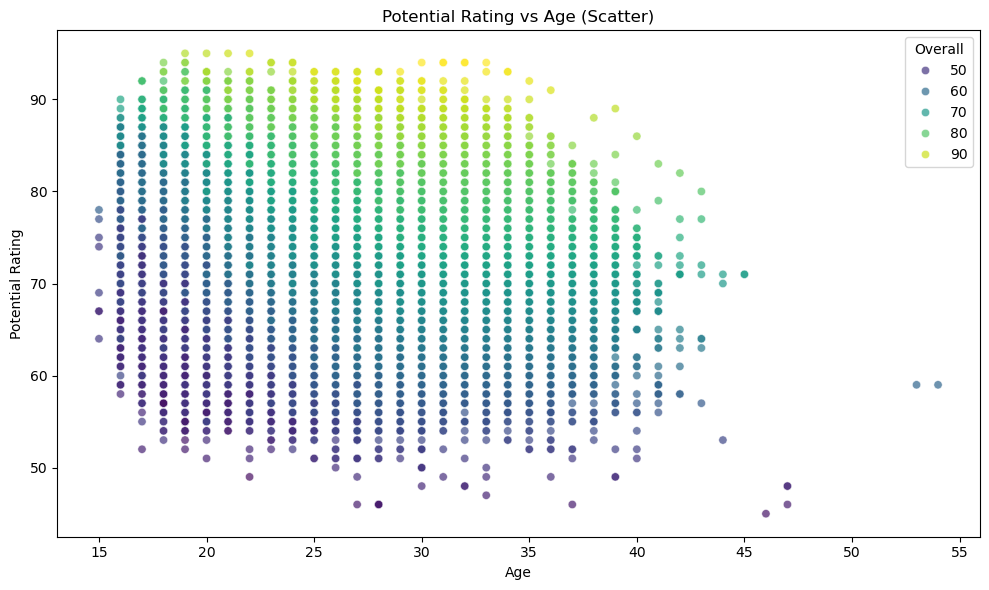

In [39]:
#Potential Rating vs Age
plt.figure(figsize=(10,6))
sns.scatterplot(data=fifa, x='Age', y='Potential', hue='Overall', palette='viridis', alpha=0.7)
plt.title('Potential Rating vs Age (Scatter)')    
plt.xlabel('Age')
plt.ylabel('Potential Rating')
plt.tight_layout()
plt.show()
#This graph shows exactly what it says, potential vs age

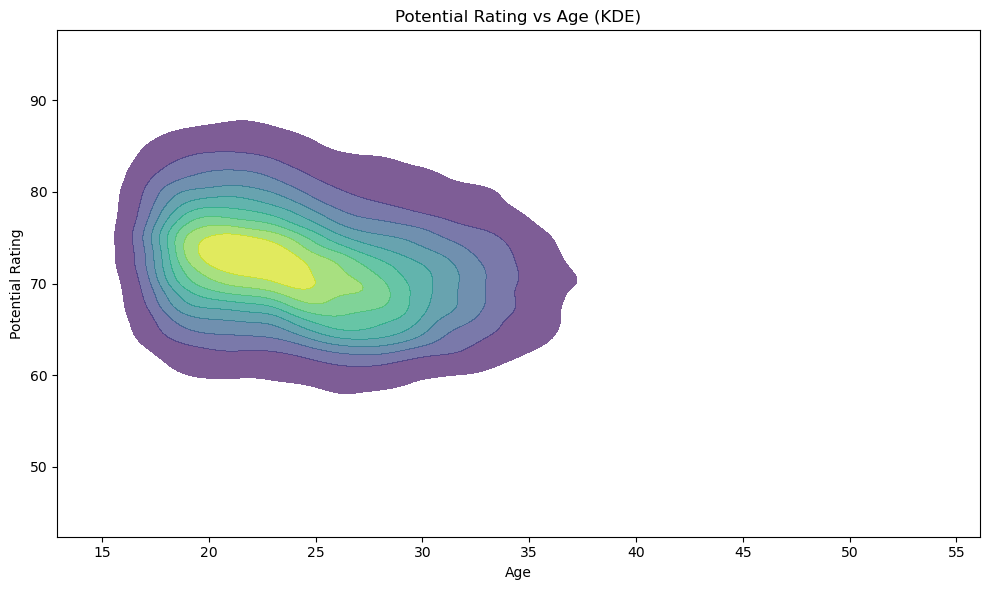

In [ ]:
#Potential Rating vs Age
plt.figure(figsize=(10,6))
sns.kdeplot(data=fifa, x='Age', y='Potential', cmap='viridis', fill=True, alpha=0.7)
plt.title('Potential Rating vs Age (KDE)')
plt.xlabel('Age')
plt.ylabel('Potential Rating')
plt.tight_layout()
plt.show()
#This graph shows exactly what it says, potential vs age
#Alt of scatter plot, better visualization of density